In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
#import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D 
import spiceypy as spice

ET One: 140961664.18440723, ET Two: 186667264.18308285
[140961664.18440723, 140973090.5844069, 140984516.98440656]
Positions: 
[-5461446.61080924 -4434793.40785864 -1200385.93315424]
Light Times: 
23.806223878250965


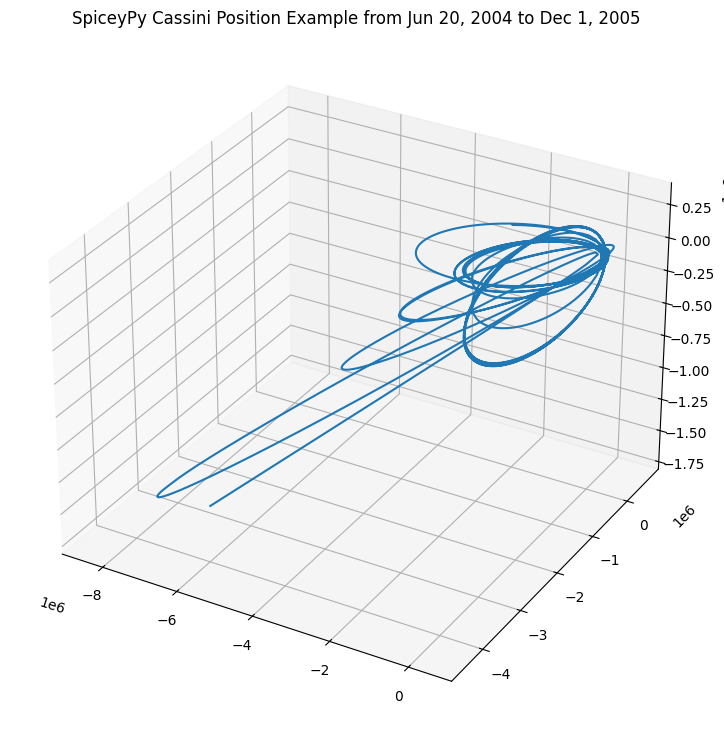

In [3]:
spice.furnsh("./cassMetaK.txt")

step = 4000

# we are going to get positions between these two dates
utc = ['Jun 20, 2004', 'Dec 1, 2005'] # will iteratively need to be changed

# get et values one and two, we could vectorize str2et
etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])
print("ET One: {}, ET Two: {}".format(etOne, etTwo))

# get times
times = [x*(etTwo-etOne)/step + etOne for x in range(step)]

# # check first few times:
# print(times[0:3])

#Run spkpos as a vectorized function
positions, lightTimes = spice.spkpos('Cassini', times, 'J2000', 'NONE', 'SATURN BARYCENTER')

# # Positions is a 3xN vector of XYZ positions
# print("Positions: ")
# print(positions[0])

# # Light times is a N vector of time
# print("Light Times: ")
# print(lightTimes[0])

spice.kclear()

positions = positions.T # positions is shaped (4000, 3), let's transpose to (3, 4000) for easier indexing
fig = plt.figure(figsize=(9, 9))
ax  = fig.add_subplot(111, projection='3d')
ax.plot(positions[0], positions[1], positions[2])
plt.title('SpiceyPy Cassini Position Example from Jun 20, 2004 to Dec 1, 2005')
plt.show()